In [1]:
# Load the drive helper and mount
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!ls '/content/drive/MyDrive/Colab Notebooks/Personal Projects/Bird Species prediction'

'Bird Speciees Dataset'   bird_species.h5   Untitled0.ipynb


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

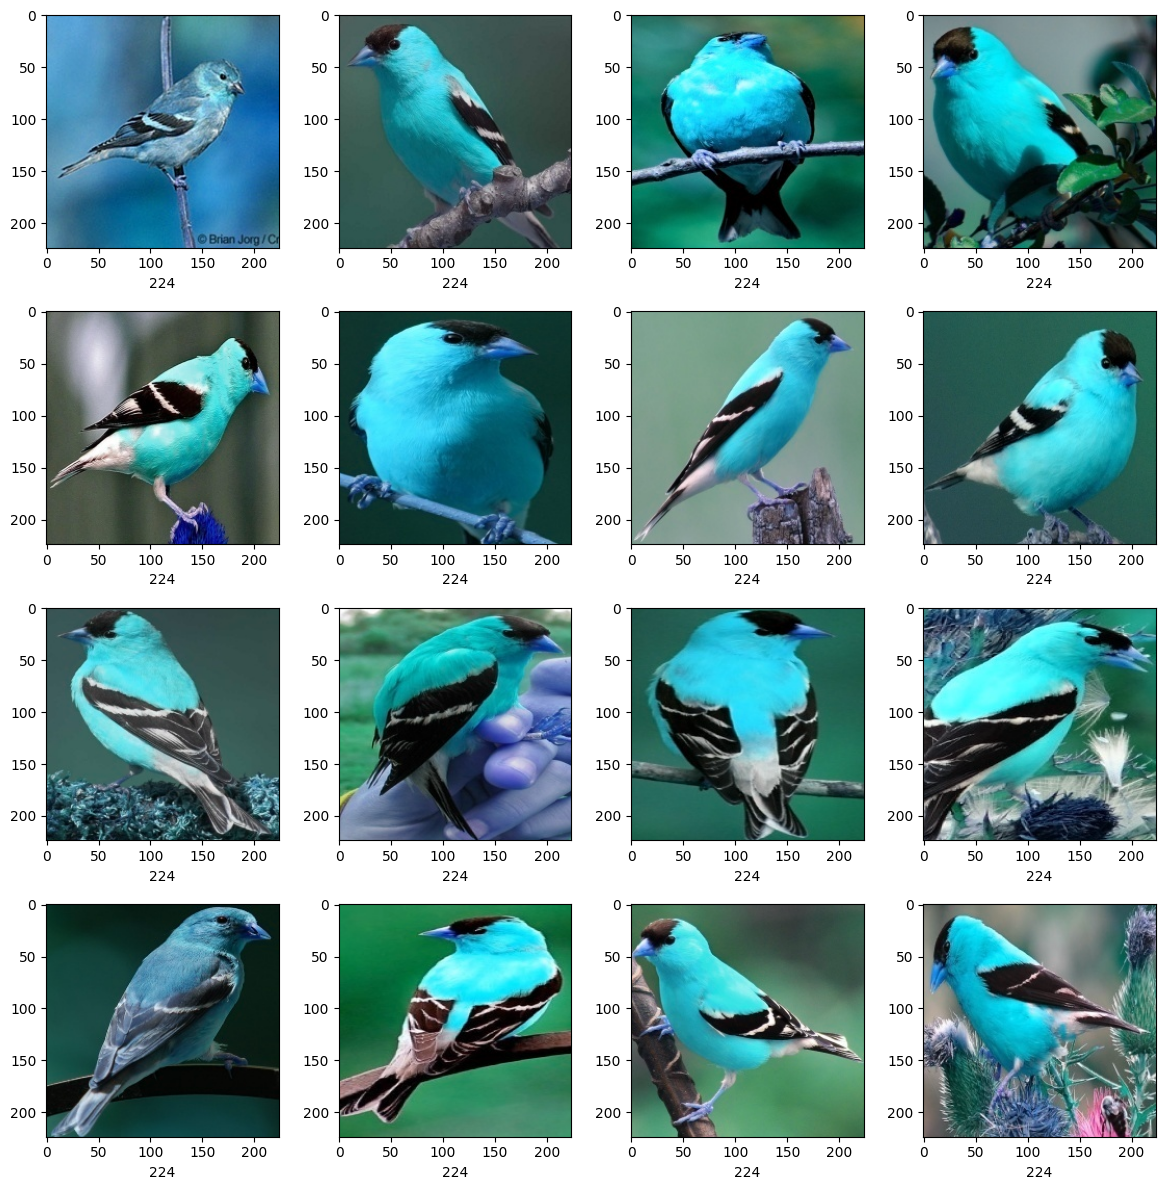

In [4]:
# Ploting 12 images to check dataset
plt.figure(figsize=(12,12))

path = '/content/drive/MyDrive/Colab Notebooks/Personal Projects/Bird Species prediction/Bird Speciees Dataset/AMERICAN GOLDFINCH'

for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = cv2.imread(path + '/' + random.choice(sorted(listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)
  plt.xlabel(rand_img.shape[0], fontsize=10)

Text(0, 0.5, '(224, 224, 3)')

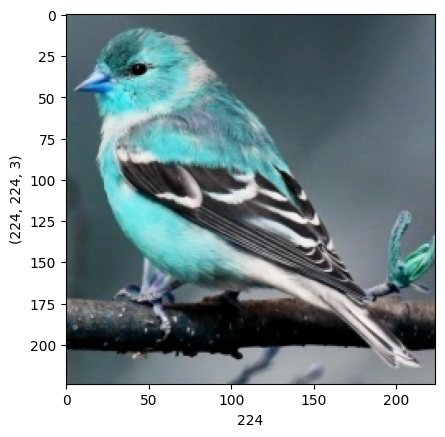

In [5]:
path = '/content/drive/MyDrive/Colab Notebooks/Personal Projects/Bird Species prediction/Bird Speciees Dataset/AMERICAN GOLDFINCH/001.jpg'

rand_img = cv2.imread(path)


plt.imshow(rand_img)
plt.xlabel(rand_img.shape[1], fontsize=10)
plt.ylabel(rand_img.shape, fontsize=10)

In [6]:
dir = '/content/drive/MyDrive/Colab Notebooks/Personal Projects/Bird Species prediction/Bird Speciees Dataset'
root_dir = listdir(dir)
image_list, label_list = [], []

- we convert images to numpy array and append it into a list then we also append its assigned labels into the list

In [7]:
for directory in root_dir:
  for File in listdir(f'{dir}/{directory}'):
    image_path = f'{dir}/{directory}/{File}'
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [8]:
# visualizing number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
print(label_counts)

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64


In [9]:
num_classes = len(label_counts)
print(num_classes)

6


In [10]:
image_list[0].shape

(224, 224, 3)

In [11]:
## checking the size of the single image
label_list = np.array(label_list)
label_list.shape

(811,)

In [12]:
## now we are spliting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size = 0.2, random_state = 10)

In [13]:
print(f"x_train :- {np.array(x_train).shape}")
print(f"y_train :- {y_train.shape}")
print(f"x_test  :- {np.array(x_test).shape}")
print(f"x_test  :- {y_test.shape}")

x_train :- (648, 224, 224, 3)
y_train :- (648,)
x_test  :- (163, 224, 224, 3)
x_test  :- (163,)


In [14]:
# Next we will Normalize the image by deviding it by 255
x_train = np.array(x_train, dtype = np.float16)/ 255
x_test = np.array(x_test, dtype = np.float16)/ 255
x_train = x_train.reshape(-1, 224, 224, 3)
x_test = x_test.reshape(-1, 224, 224, 3)

In [15]:
print(f"x_train :- {np.array(x_train).shape}")
print(f"y_train :- {y_train.shape}")
print(f"x_test  :- {np.array(x_test).shape}")
print(f"y_test  :- {y_test.shape}")

x_train :- (648, 224, 224, 3)
y_train :- (648,)
x_test  :- (163, 224, 224, 3)
x_test  :- (163,)


In [16]:
# next we will use label binarizer to one hot encode our y data, we will also print the sequence of classes
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [17]:
## now we need to create training and validation samples
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [18]:
x_train.shape

(518, 224, 224, 3)

In [19]:
model = Sequential()
model.add(Conv2D(8, (3,3), padding='same', input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

In [20]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0005), metrics=['accuracy'])

In [21]:
# Training the modele
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs = epochs, validation_data  = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 6s 226ms/step - loss: 1.8046 - accuracy: 0.1718 - val_loss: 1.7533 - val_accuracy: 0.1846
Epoch 2/50
5/5 [==============================] - 0s 95ms/step - loss: 1.7235 - accuracy: 0.2085 - val_loss: 1.7097 - val_accuracy: 0.2846
Epoch 3/50
5/5 [==============================] - 0s 76ms/step - loss: 1.6531 - accuracy: 0.3571 - val_loss: 1.6495 - val_accuracy: 0.3308
Epoch 4/50
5/5 [==============================] - 0s 77ms/step - loss: 1.5763 - accuracy: 0.4054 - val_loss: 1.5456 - val_accuracy: 0.3923
Epoch 5/50
5/5 [==============================] - 0s 90ms/step - loss: 1.5040 - accuracy: 0.3977 - val_loss: 1.4638 - val_accuracy: 0.4308
Epoch 6/50
5/5 [==============================] - 0s 78ms/step - loss: 1.4229 - accuracy: 0.4710 - val_loss: 1.3805 - val_accuracy: 0.4308
Epoch 7/50
5/5 [==============================] - 0s 91ms/step - loss: 1.3238 - accuracy: 0.4402 - val_loss: 1.2948 - val_accuracy: 0.4923
Epoch 8/50
5/5 [==========

In [22]:
model.save("/content/drive/MyDrive/Colab Notebooks/Personal Projects/Bird Species prediction/bird_species.h5")

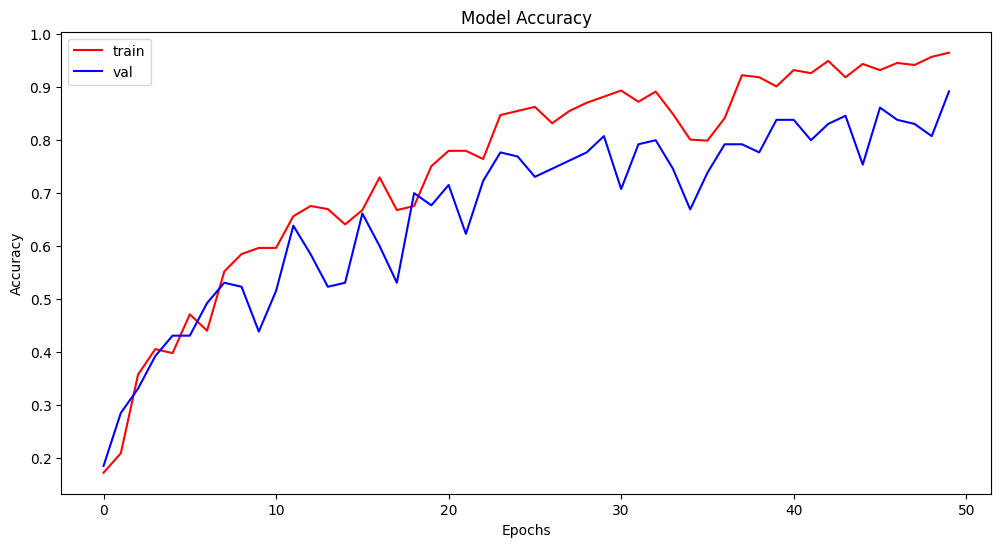

In [23]:
# plot the accuracy history

plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

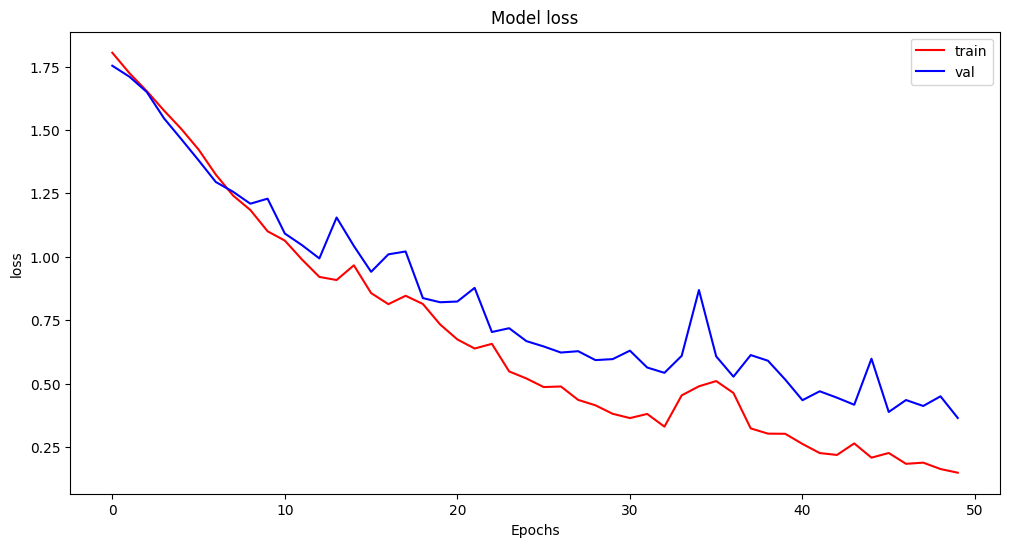

In [24]:
# plot the loss history
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [29]:
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy:- {scores[1]*100}")

6/6 [==============================] - 0s 18ms/step - loss: 0.5427 - accuracy: 0.8282
Test Accuracy:- 82.82208442687988


In [31]:
# making prediction on test data
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 11ms/step


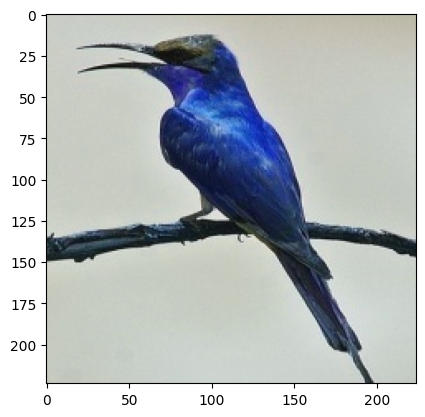

In [44]:
img = img_to_array(x_test[6])
plt.imshow(img)

In [45]:
labels = lb.classes_
print(labels)

print(f"actual class :- {labels[np.argmax(y_test[6])]}")
print(f"Predicted class :- {labels[np.argmax(y_pred[6])]}")

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
actual class :- CARMINE BEE-EATER
Predicted class :- CARMINE BEE-EATER
